In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer_booking_preprocessed.csv")

In [3]:
# Mean Encoding 

mean_target = df.groupby('route')['booking_complete'].mean()
df['encoded_route'] = df['route'].map(mean_target)


In [4]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_complete,total_service_preferences,encoded_route
0,1,35,20,2,1,HKTMEL,Australia,8.83,True,False,False,False,True,0,1,0.173077
1,1,155,24,23,1,AKLKUL,Hungary,8.83,False,True,False,False,True,0,1,0.583600
2,2,21,5,13,2,LGKTPE,Malaysia,4.67,True,False,False,False,True,0,0,0.928571
3,2,172,40,7,6,PEKPEN,Malaysia,6.42,True,False,False,False,True,0,1,0.796875
4,1,9,22,2,5,MELPEN,Australia,8.83,True,False,False,False,True,0,2,0.590517


In [5]:
# Mean Encoding 

mean_target = df.groupby('booking_origin')['booking_complete'].mean()
df['encoded_booking_origin'] = df['booking_origin'].map(mean_target)


In [6]:
df = df.drop(columns=['booking_origin','route'])

In [7]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_complete,total_service_preferences,encoded_route,encoded_booking_origin
0,1,35,20,2,1,8.83,True,False,False,False,True,0,1,0.173077,0.232788
1,1,155,24,23,1,8.83,False,True,False,False,True,0,1,0.583600,0.000000
2,2,21,5,13,2,4.67,True,False,False,False,True,0,0,0.928571,0.740673
3,2,172,40,7,6,6.42,True,False,False,False,True,0,1,0.796875,0.740673
4,1,9,22,2,5,8.83,True,False,False,False,True,0,2,0.590517,0.232788


In [8]:
df.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'flight_duration', 'sales_channel_Internet',
       'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip', 'booking_complete', 'total_service_preferences',
       'encoded_route', 'encoded_booking_origin'],
      dtype='object')

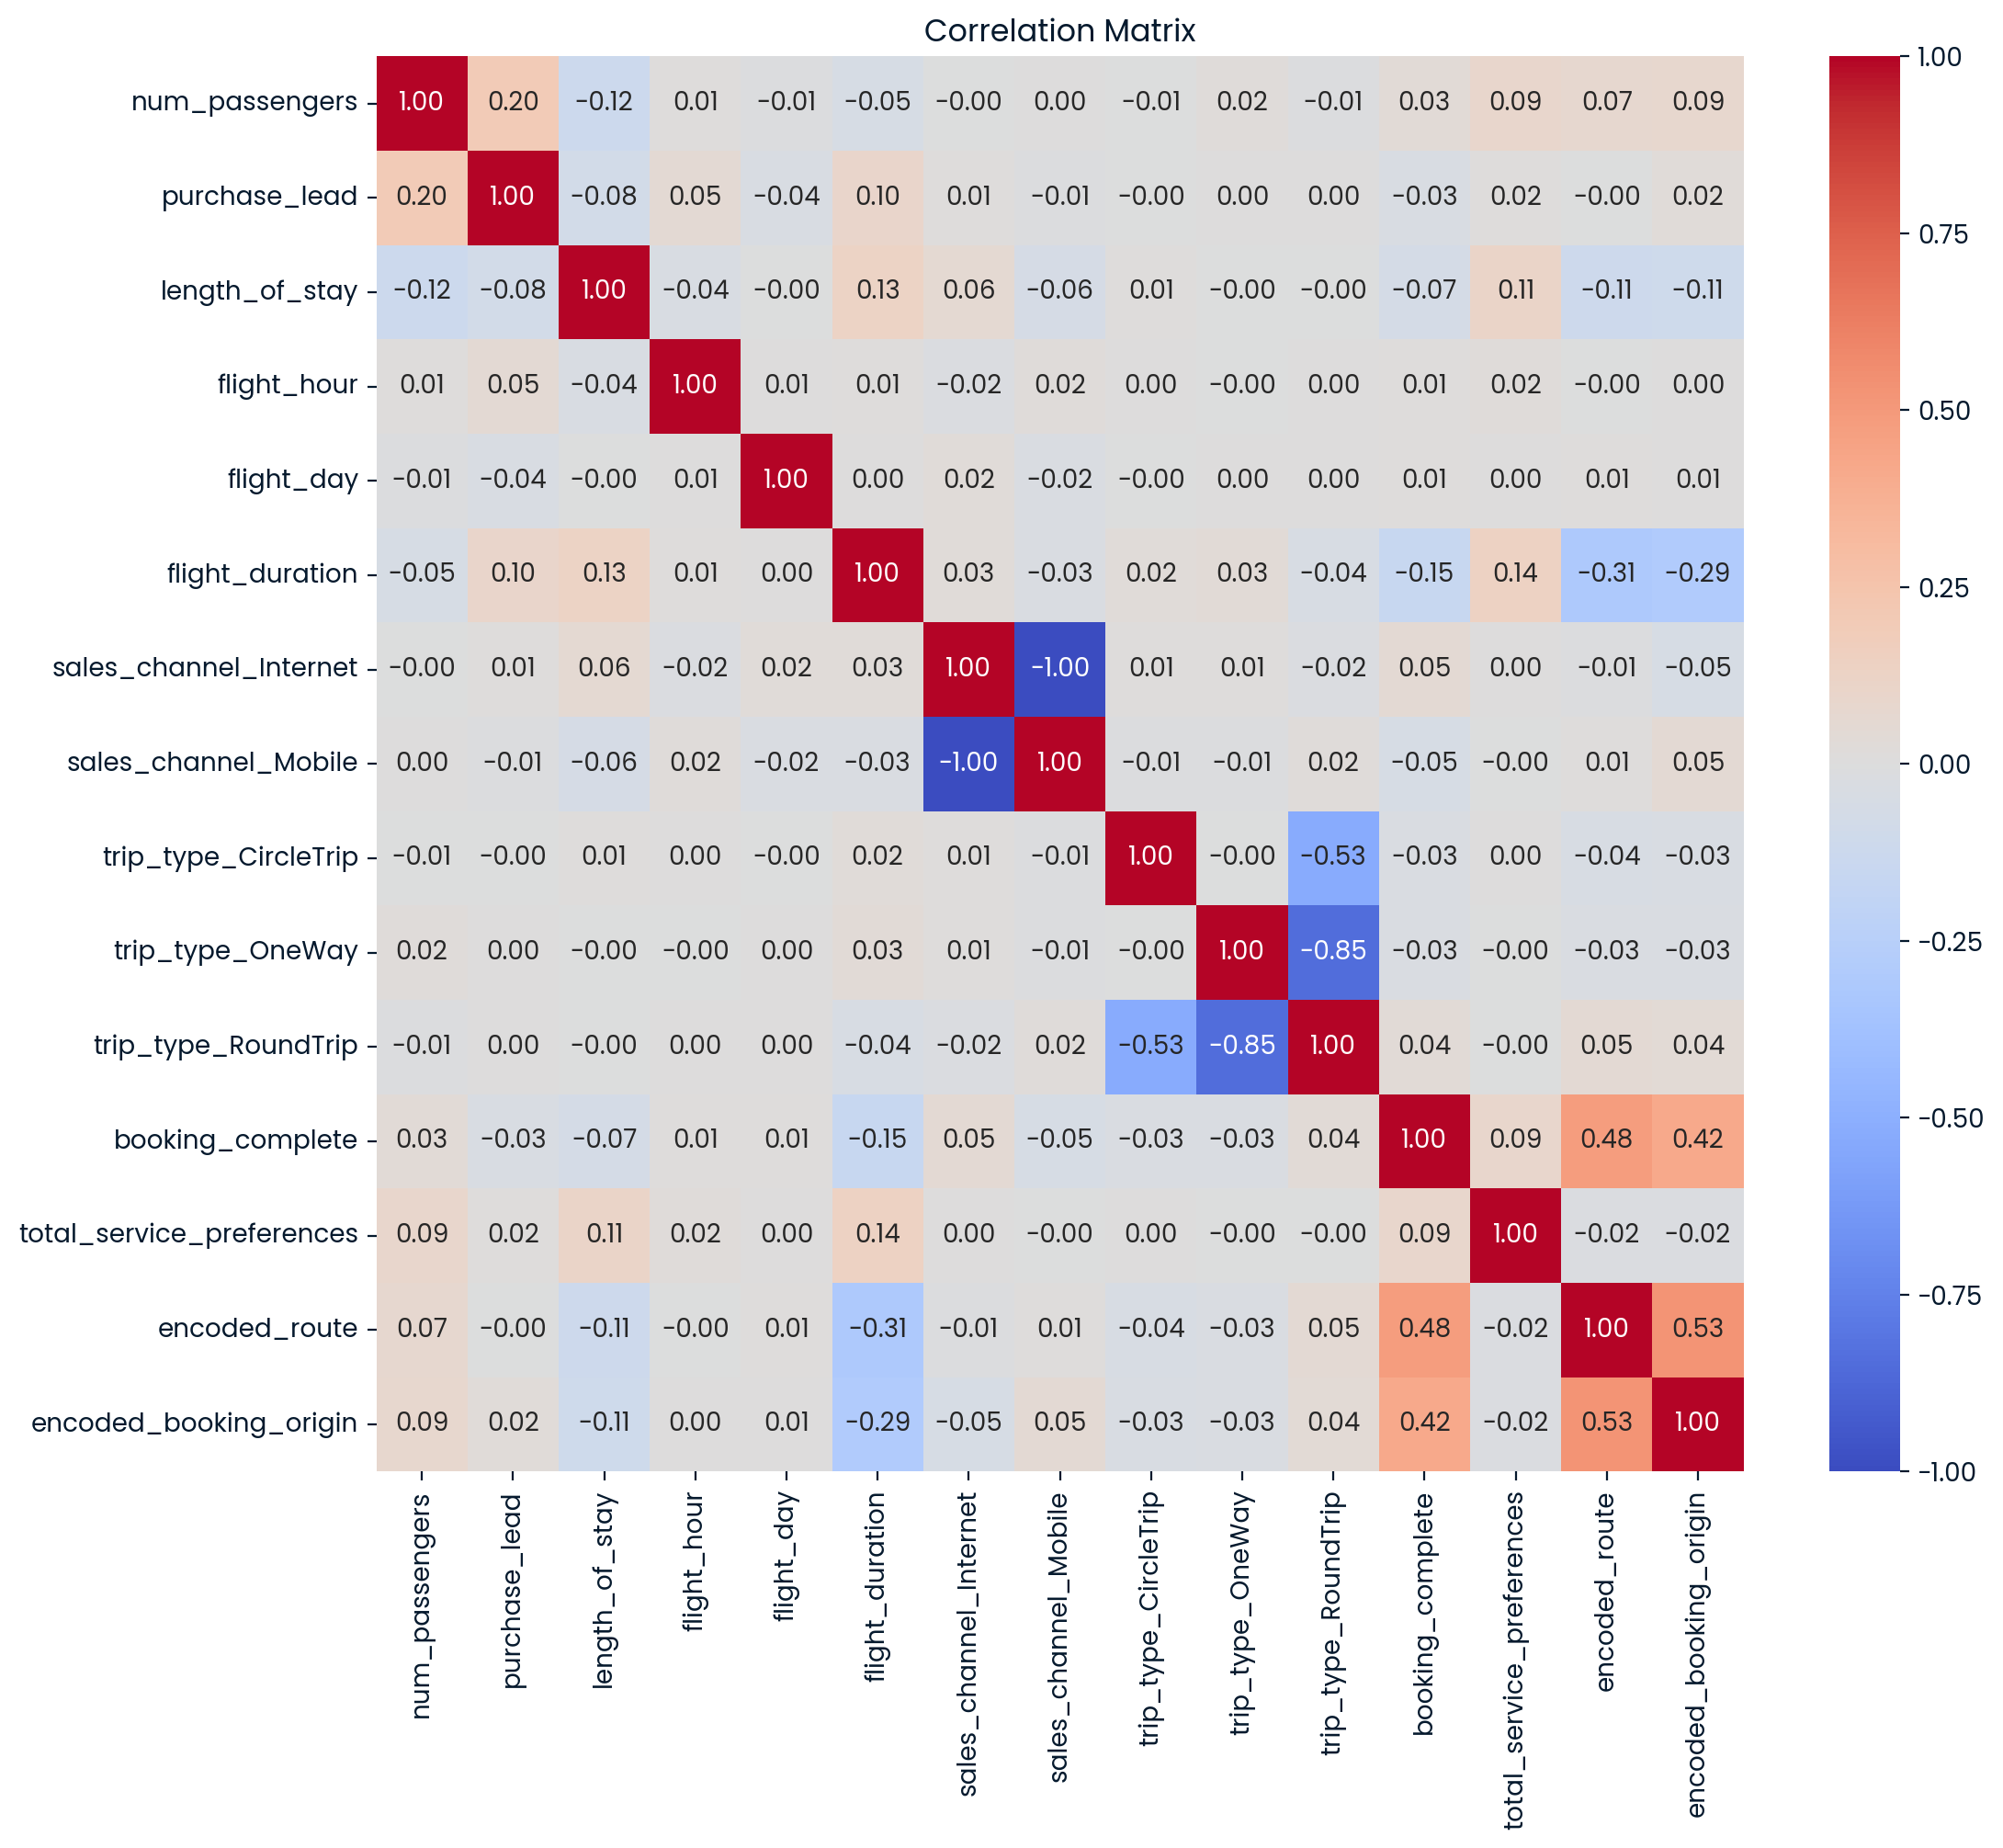

In [9]:
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [10]:
correlation_matrix

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_complete,total_service_preferences,encoded_route,encoded_booking_origin
num_passengers,1.000000,0.202643,-0.121440,0.008458,-0.011425,-0.053053,-0.001861,0.001861,-0.006791,0.020188,-0.013521,0.031425,0.090793,0.073818,0.085883
purchase_lead,0.202643,1.000000,-0.082058,0.051250,-0.037141,0.098200,0.011757,-0.011757,-0.001938,0.000291,0.000783,-0.033621,0.015277,-0.002736,0.023679
length_of_stay,-0.121440,-0.082058,1.000000,-0.037910,-0.001588,0.132390,0.060878,-0.060878,0.012641,-0.004704,-0.002728,-0.066723,0.111365,-0.113642,-0.107086
flight_hour,0.008458,0.051250,-0.037910,1.000000,0.005888,0.011681,-0.019167,0.019167,0.001946,-0.003230,0.001706,0.013407,0.016421,-0.001052,0.001641
flight_day,-0.011425,-0.037141,-0.001588,0.005888,1.000000,0.001069,0.023999,-0.023999,-0.004462,0.002450,0.000293,0.011627,0.000733,0.013518,0.005466
flight_duration,-0.053053,0.098200,0.132390,0.011681,0.001069,1.000000,0.027172,-0.027172,0.023538,0.031793,-0.039490,-0.149252,0.136623,-0.311400,-0.290342
sales_channel_Internet,-0.001861,0.011757,0.060878,-0.019167,0.023999,0.027172,1.000000,-1.000000,0.014008,0.012323,-0.017904,0.052670,0.002754,-0.011376,-0.053621
sales_channel_Mobile,0.001861,-0.011757,-0.060878,0.019167,-0.023999,-0.027172,-1.000000,1.000000,-0.014008,-0.012323,0.017904,-0.052670,-0.002754,0.011376,0.053621
trip_type_CircleTrip,-0.006791,-0.001938,0.012641,0.001946,-0.004462,0.023538,0.014008,-0.014008,1.000000,-0.002941,-0.529084,-0.026987,0.002152,-0.041309,-0.032032
trip_type_OneWay,0.020188,0.000291,-0.004704,-0.003230,0.002450,0.031793,0.012323,-0.012323,-0.002941,1.000000,-0.847010,-0.028839,-0.001278,-0.030488,-0.026067


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import  StandardScaler



# Define features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.6478777589134126
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      1462
           1       0.66      0.63      0.64      1483

    accuracy                           0.65      2945
   macro avg       0.65      0.65      0.65      2945
weighted avg       0.65      0.65      0.65      2945

Confusion Matrix:
[[973 489]
 [548 935]]


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train the decision tree model with the best parameters
best_dt_model = grid_search.best_estimator_

# Make predictions
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini

In [13]:
from sklearn.ensemble import RandomForestClassifier




# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7388794567062819
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1462
           1       0.73      0.77      0.75      1483

    accuracy                           0.74      2945
   macro avg       0.74      0.74      0.74      2945
weighted avg       0.74      0.74      0.74      2945

Confusion Matrix:
[[1034  428]
 [ 341 1142]]


In [14]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train the Random Forest model with the best parameters
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV

In [15]:

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7449915110356536
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1462
           1       0.73      0.79      0.76      1483

    accuracy                           0.74      2945
   macro avg       0.75      0.74      0.74      2945
weighted avg       0.75      0.74      0.74      2945

Confusion Matrix:
[[1016  446]
 [ 305 1178]]


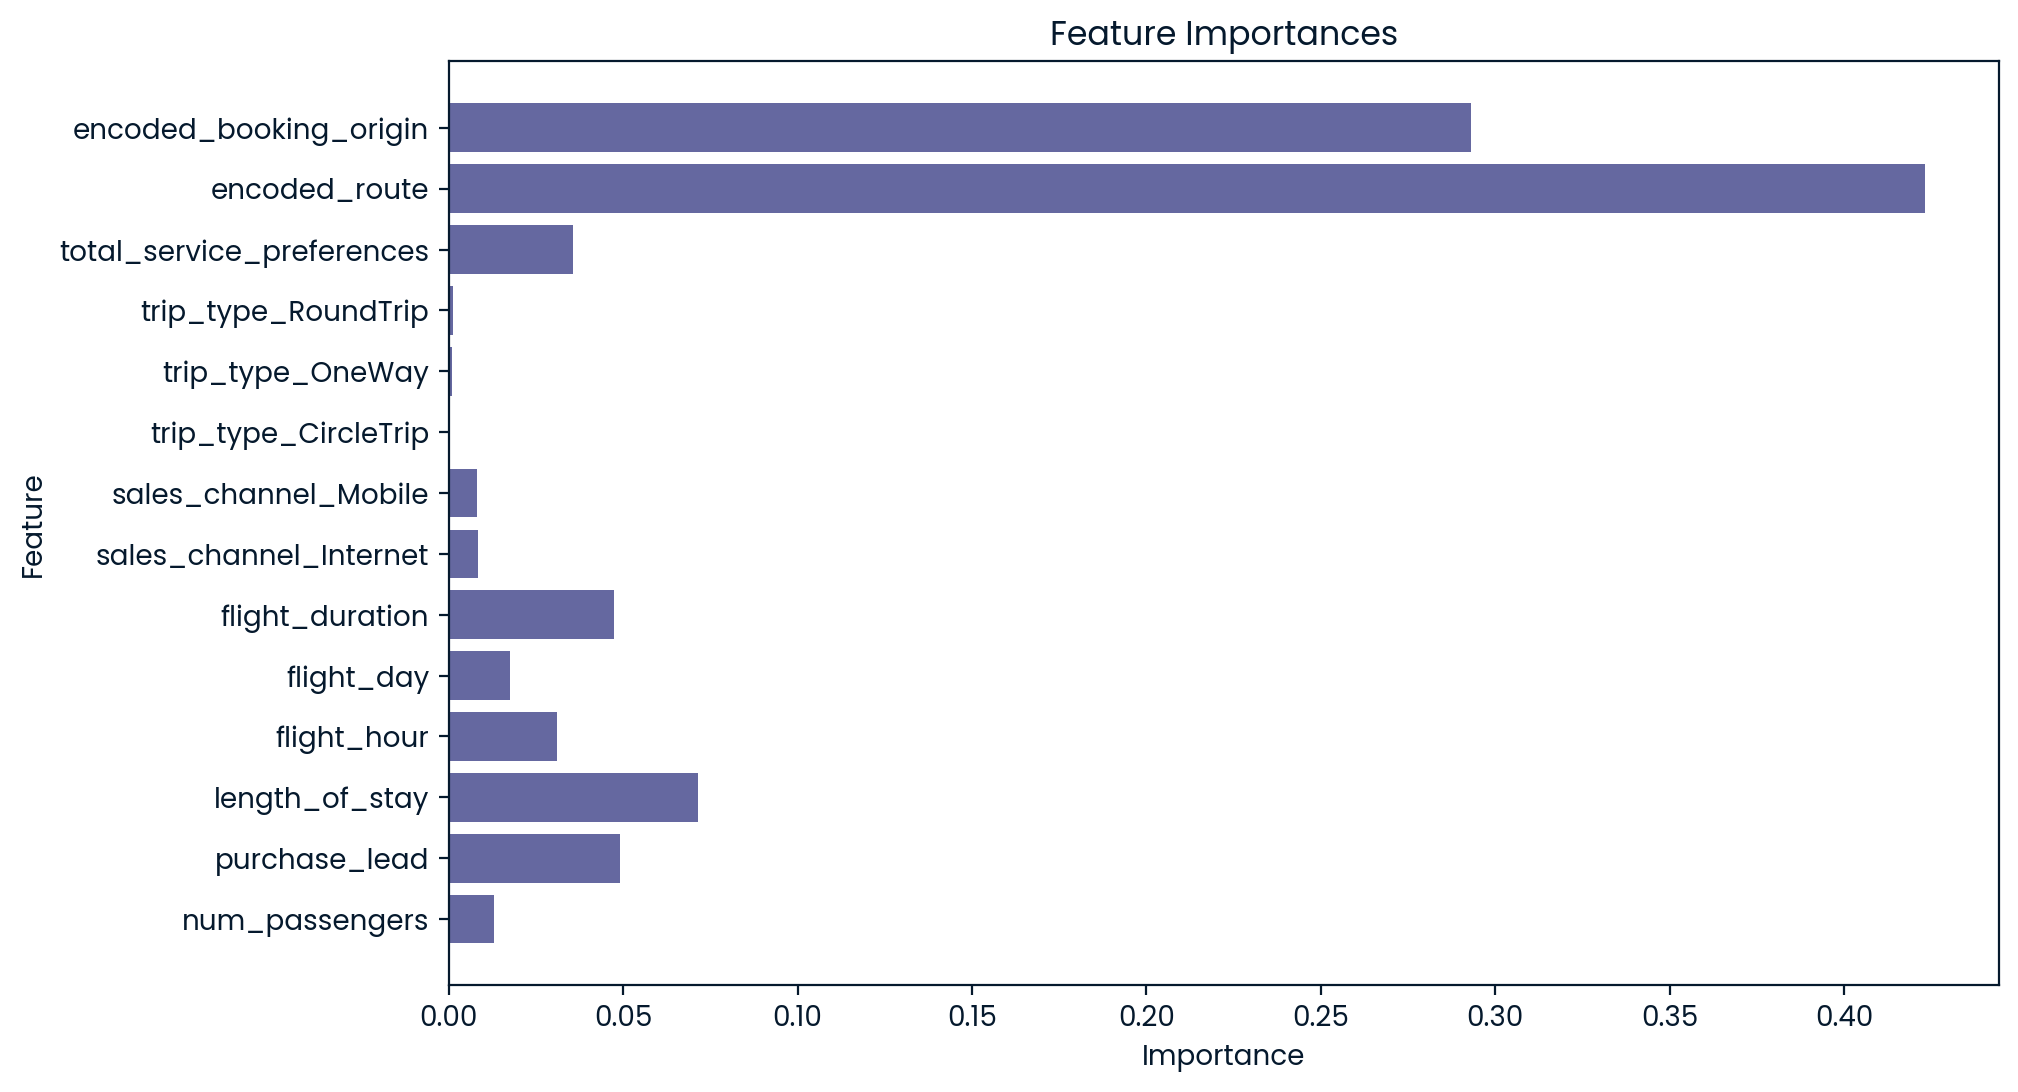

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming clf is your trained model
feature_importances = best_rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()
